In [524]:
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Helper methods

In [525]:
def polynomial_function(x_values, exponentation_level, exp_min, exp_max, function_param_min, function_param_max):
    exponentation_level = exponentation_level
    function_parameters = list()
    
    for i in range(1, exponentation_level + 1):
        function_parameters.append((np.random.uniform(function_param_min, function_param_max), i))
    
    y_values = list()
    for x in x_values:
        y = 0
        for parameter in function_parameters:
            y += parameter[0] * np.power(x, parameter[1])
        y_values.append(y)
        
    return y_values

In [526]:
def generate_values_in_range(samples_num, min_val, max_val):
    values = list()
    for i in range(0, samples_num):
        values.append(np.random.uniform(min_val, max_val))
    return values    

In [527]:
def add_noise(values):
    noised_values = list()
    for val in values:
        noised_val = val + np.max(values) * np.random.uniform(-0.1, 0.1)
        noised_values.append(noised_val)
    
    return noised_values

In [528]:
def generate_polynomial_regression_problem(samples_num, exponentation_level):
    x_values = generate_values_in_range(samples_num, -5, 5)
    y_values = polynomial_function(x_values, exponentation_level, 2, 6, -5 , 5)
    y_values = add_noise(y_values)
    return np.array(x_values).reshape(-1, 1), np.array((y_values)).reshape(-1, 1)

### Generate problem

In [529]:
samples_num = 100
exponentation_level = 2

In [530]:
x_values, y_values = generate_polynomial_regression_problem(samples_num, exponentation_level)

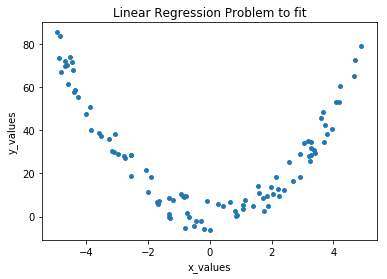

In [531]:
# Presenting generated data
plt.scatter(x_values, y_values, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.show()

### Raw solution

Calculating cost function as Mean Squared Errors:

\begin{equation*}
 MSE   = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2
\end{equation*}

where:
 - x - input to classifier
 - y - ideal output for given x
 - θ - weight for x representing feature
 - m - number of all samples 
 - i - index of sample

In [532]:
def mean_squared_errors(X, y, theta):
    samples_num = len(X)
    predictions = np.dot(X, theta)
    square_error = np.sum(np.square(predictions - y))
    return square_error / (2 * samples_num)

Gradient descent for used (above) MSE equation.

Repeat until model converges:

\begin{equation*}
 \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_0
\end{equation*}
\begin{equation*}
 \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_1
\end{equation*}

\begin{equation*}
 ...
\end{equation*}

\begin{equation*}
 \theta_n = \theta_n - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_n
\end{equation*}

where:
 - α - learning rate
 - x - input to classifier
 - y - ideal output for given x
 - θ - weight for x representing feature
 - m - number of all samples 
 - i - index of sample

In [533]:
def gradient_descent(X, y, theta, iterations, learning_rate):
    # Container for error from each gradient step
    error_history = []
    
    # Calculating initial error and saving it
    initial_error = mean_squared_errors(X, y, theta)
    error_history.append(initial_error)
    
    # Performing gradient step 'iterations' times
    for i in range(0, iterations):
        
        # Updating theta values
        theta = gradient_step(X, y, theta, learning_rate)
        
        # Calculating and saving error from current gradient step
        error = mean_squared_errors(X, y, theta)
        error_history.append(error)
        
        # Displaying train progress
        if i % 100 == 0:
            print("Iteration no. " + str(i) + ", error: " + str(error))
        
    return theta, error_history

In [534]:
# Vector implementation (without using loops) of gradient equations above
def gradient_step(X, y, theta, learning_rate):
    theta_num = len(theta)
    samples_num = len(X)
    predictions = np.dot(X, theta)
    grad_delta = (1 / samples_num) * np.dot(X.T, predictions - y)
    theta = theta - learning_rate * grad_delta
    return theta

Training model
\begin{equation*}
 h(x) = \theta_0 + \theta_1x + \theta_2x^2
\end{equation*}

In [535]:
# Hyperparameters
learning_rate = 0.0001
iterations = 2000

In [536]:
# Adding bias column (column of ones) to input values
bias = np.ones(len(x_values))
exp_one_x_values = x_values
exp_two_x_values = x_values ** 2
X = np.column_stack((bias, exp_one_x_values, exp_two_x_values))

# Specifying ideal outputs
y = y_values

In [537]:
# Parameters for model
theta = np.zeros((X.shape[1], 1))

Training model

In [538]:
# Performing gradient descent
trained_theta, error_history = gradient_descent(X, y, theta, iterations, learning_rate)

Iteration no. 0, error: 666.523850752
Iteration no. 100, error: 56.2485027677
Iteration no. 200, error: 14.7518870217
Iteration no. 300, error: 11.8983229288
Iteration no. 400, error: 11.6751394405
Iteration no. 500, error: 11.6351888843
Iteration no. 600, error: 11.6115318252
Iteration no. 700, error: 11.592231185
Iteration no. 800, error: 11.57597173
Iteration no. 900, error: 11.56223804
Iteration no. 1000, error: 11.5506351558
Iteration no. 1100, error: 11.5408321677
Iteration no. 1200, error: 11.5325497123
Iteration no. 1300, error: 11.5255517984
Iteration no. 1400, error: 11.5196390629
Iteration no. 1500, error: 11.5146430859
Iteration no. 1600, error: 11.510421587
Iteration no. 1700, error: 11.5068543691
Iteration no. 1800, error: 11.5038398904
Iteration no. 1900, error: 11.5012923693


In [539]:
trained_theta

array([[ 0.19512258],
       [-0.38115198],
       [ 3.15295575]])

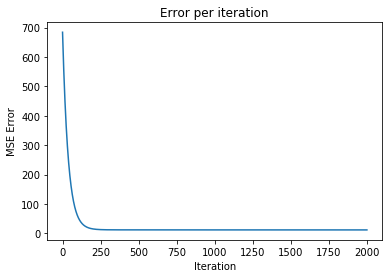

In [540]:
# Model learning history
plt.plot(error_history)
plt.title("Error per iteration")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')
plt.show()

In [541]:
def hypothesis(x, theta):
    return trained_theta[0][0] + trained_theta[1][0] * x + trained_theta[2][0] * x ** 2

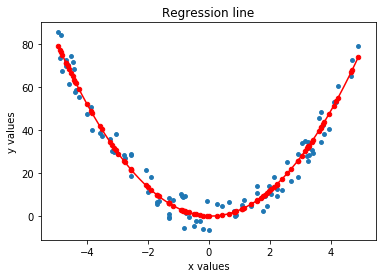

In [542]:
# Displaying dataset
plt.scatter(x_values, y_values, s=15)

# Displaying aproximated function
min_x = np.min(x_values)
max_x = np.max(x_values)
function_x = np.arange(min_x, max_x, 0.01)
function_y = [hypothesis(x, trained_theta) for x in function_x]
plt.plot(function_x, function_y, c="red")

# Displaying predicted values
y_predicted = np.dot(X, trained_theta)
plt.scatter(x_values, y_predicted, s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()